
Running ml_period
Accuracy:0.619504132231
                           price      w orders
date                                          
2018-04-17 12:00:00  8112.110789   True    NaN
2018-04-17 12:05:00  8122.232970  False   SELL

Running ml_xgb
Accuracy:0.534876033058
                           price  w orders
date                                      
2018-04-17 12:00:00  8112.110789  0   WAIT
2018-04-17 12:05:00  8122.232970  1    BUY

Running ml_randfor
Accuracy:0.527603305785
                           price  w orders
date                                      
2018-04-17 12:00:00  8112.110789  1    NaN
2018-04-17 12:05:00  8122.232970  1   WAIT

	USDT_BTC

Retorno del mercacdo: 15.5929975119
Retorno ml_period 258.917571695
Retorno ml_xgb -6.29888739394
Retorno ml_randfor 4.71697350754


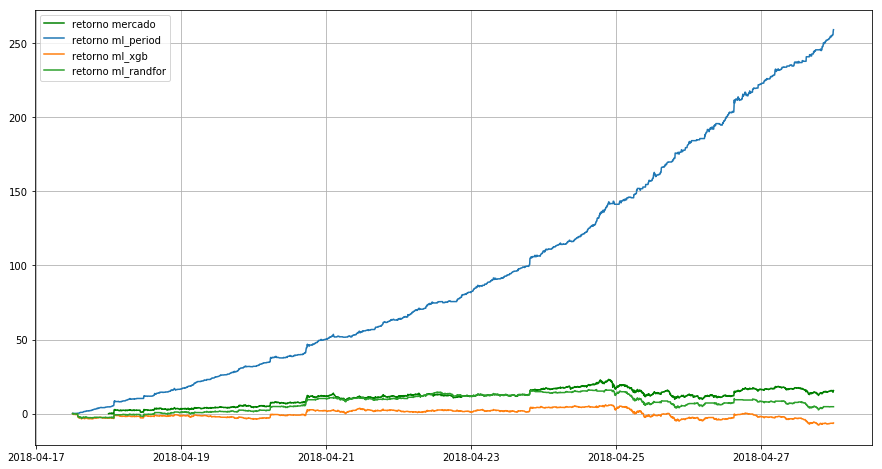

In [4]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy, makeVolatility
import numpy as np
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="USDT_BTC"


start=string2ts("2018-04-18 00:00:00")
end=string2ts("2018-04-28 00:00:00")
period=3600/12

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)

per = 0.85
cum_return1 = marketReturn(df["close"]) 

marketRet = marketReturn(df["close"])[-1]*100 

# calculando volatilidad en función del tamaño de las velas
df["volatility"] = makeVolatility(df,c=1.7)

from profit import profit,profit2

start2 = ml_init_time(end,start,per)

df12 = prepareData(pair=pair, start=start2, end=end, period=period)

# "ml_stacking",
# "ml_randfor", "ml_xgb",
strategies = [ "ml_period", "ml_xgb", "ml_randfor"]

list_profit = []
list_v = []

for strategy in strategies:
    
    print "\nRunning",strategy
    w, t = run_strategy(strategy, df12, pair, True, per)
    relativeReturn,v = profit(w)
    
    list_profit.append(relativeReturn)
    list_v.append(v)

    
print "\n\t%s\n"%pair
print 'Retorno del mercacdo: %s'%(marketRet)
for i, strategy in enumerate(strategies):
    print "Retorno", strategy, list_profit[i]*100

plt.plot(df.index[:],cum_return1*100,'g', label='retorno mercado')
for i, strategy in enumerate(strategies):
    
    plt.plot(df12.index[int(len(df12)*per):],list_v[i]*100,label='retorno '+strategy)

plt.legend(loc='best')
plt.grid()